Text(0, 0.5, 'P error')

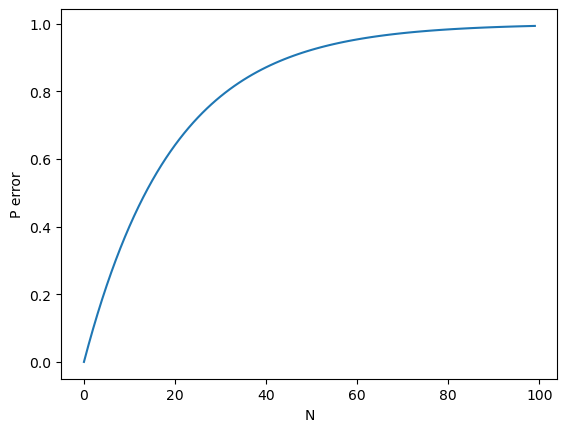

In [1]:

import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('P error')

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?
 - when the differences between means are greater, then you have a higher chances of rejecting the null hypothesis and find statistically signifcant results in this test.

In [2]:
import numpy as np
from scipy import stats

np.random.seed(0)  # Set seed for reproducibility
num_tests = 1000
alpha = 0.05
p_values = []

for _ in range(num_tests):
    sample1 = np.random.normal(0, 1, 100)  # Sample 1 with mean 0, std deviation 1
    sample2 = np.random.normal(0, 1, 100)  # Sample 2 with mean 0, std deviation 1
    _, p_value = stats.ttest_ind(sample1, sample2)
    p_values.append(p_value)

significant_results = sum(np.array(p_values) < alpha)
print(f"Number of significant results (p < {alpha}): {significant_results}")


Number of significant results (p < 0.05): 53


In [12]:
import numpy as np
from scipy import stats
import statsmodels.stats.multitest as smm

np.random.seed(0)  # Set seed for reproducibility
num_tests = 1000
alpha = 0.05
p_values = []

for _ in range(num_tests):
    sample1 = np.random.normal(0, 1, 100)  # Sample 1 with mean 0, std deviation 1
    sample2 = np.random.normal(0, 1, 100)  # Sample 2 with mean 0, std deviation 1
    _, p_value = stats.ttest_ind(sample1, sample2)
    p_values.append(p_value)

significant_results = sum(np.array(p_values) < alpha)

# Apply Bonferroni correction
bonferroni_alpha = alpha / num_tests
significant_results_bonferroni = sum(np.array(p_values) < bonferroni_alpha)

# Apply Benjamini-Hochberg correction
reject, corrected_p_values_bh, _, _ = smm.multipletests(p_values, alpha=alpha, method='fdr_bh')
significant_results_bh = sum(reject)

print(f"Number of significant results (p < {alpha}): {significant_results}")
print(f"Bonferroni correction: {bonferroni_alpha}")
print(f"Number of significant results (Bonferroni corrected p < {bonferroni_alpha}): {significant_results_bonferroni}")
print(f"Number of significant results (Benjamini-Hochberg corrected p < {alpha}): {significant_results_bh}")


Number of significant results (p < 0.05): 53
Bonferroni correction: 5e-05
Number of significant results (Bonferroni corrected p < 5e-05): 0
Number of significant results (Benjamini-Hochberg corrected p < 0.05): 0


In [13]:
import numpy as np
from scipy import stats
import statsmodels.stats.multitest as smm

np.random.seed(0)  # Set seed for reproducibility
num_tests = 1000
alpha = 0.05
p_values = []

for _ in range(num_tests):
    sample1 = np.random.normal(1, 1, 100)  # Sample 1 with mean 0, std deviation 1
    sample2 = np.random.normal(2, 1, 100)  # Sample 2 with mean 0, std deviation 1
    _, p_value = stats.ttest_ind(sample1, sample2)
    p_values.append(p_value)

significant_results = sum(np.array(p_values) < alpha)

# Apply Bonferroni correction
bonferroni_alpha = alpha / num_tests
significant_results_bonferroni = sum(np.array(p_values) < bonferroni_alpha)

# Apply Benjamini-Hochberg correction
reject, corrected_p_values_bh, _, _ = smm.multipletests(p_values, alpha=alpha, method='fdr_bh')
significant_results_bh = sum(reject)

print(f"Number of significant results (p < {alpha}): {significant_results}")
print(f"Bonferroni correction: {bonferroni_alpha}")
print(f"Number of significant results (Bonferroni corrected p < {bonferroni_alpha}): {significant_results_bonferroni}")
print(f"Number of significant results (Benjamini-Hochberg corrected p < {alpha}): {significant_results_bh}")

Number of significant results (p < 0.05): 1000
Bonferroni correction: 5e-05
Number of significant results (Bonferroni corrected p < 5e-05): 998
Number of significant results (Benjamini-Hochberg corrected p < 0.05): 1000
